# Sequence Cleaning and GC Content Analysis
This notebook defines reusable functions for cleaning DNA sequences, calculating GC content, and analyzing GC variation across sliding windows.
Results are explored with Pandas and visualized as a line graph showing GC% across sequence positions.

In [12]:
def clean(seq):
 
    cleaned_sequence= "".join([base for base in seq if base in 'ATGC'])
    return cleaned_sequence
  

def gc_calculate(seq):
    
    gc =0
    for base in clean(seq):
        if base in 'GC':
            gc += 1

    gc_percent= round(gc/len(seq) * 100, 2) if len(seq) > 0 else 0
    return gc_percent

seq= input("Enter a sequence:").upper()
print(f"GC Content: {gc_calculate(seq)}%")


Enter a sequence: aaaacgggcgggtttxxx


GC Content: 44.44%


In [21]:

def clean(seq):
 
    cleaned_sequence= "".join([base for base in seq if base in 'ATGC'])
    return cleaned_sequence
  

def gc_calculate(seq):

    cleaned= clean(seq)
    gc =0
    for base in cleaned:
        if base in 'GC':
            gc += 1

    gc_percent= round(gc/len(cleaned) * 100, 2) if len(cleaned) > 0 else 0
    return gc_percent


def sliding_window(seq, window_size=10, step=5):
    
    cleaned= clean(seq)
    gc_results= []
    for i in range(0, len(cleaned) - window_size + 1, step):
        window = cleaned[i:i+window_size]
        gc_percent = gc_calculate(window)
        gc_results.append((i, window, gc_percent))

    return gc_results

seq= input("Enter a sequence:").upper()
print(f"\nGC content of full sequence: {gc_calculate(seq)}%")

print(f"\nSliding Window GC content:")

for position, window, gc in sliding_window(seq, window_size=10, step=5):
    print(f"Start: {position}, Window: {window}, GC%: {gc}")
    
        

Enter a sequence: ATGCGCGATATCGATCGCGATATAGCGCGCGTATATATAGCGCGCGTATATATATCGCG



GC content of full sequence: 49.15%

Sliding Window GC content:
Start: 0, Window: ATGCGCGATA, GC%: 50.0
Start: 5, Window: CGATATCGAT, GC%: 40.0
Start: 10, Window: TCGATCGCGA, GC%: 60.0
Start: 15, Window: CGCGATATAG, GC%: 50.0
Start: 20, Window: TATAGCGCGC, GC%: 60.0
Start: 25, Window: CGCGCGTATA, GC%: 60.0
Start: 30, Window: GTATATATAG, GC%: 20.0
Start: 35, Window: TATAGCGCGC, GC%: 60.0
Start: 40, Window: CGCGCGTATA, GC%: 60.0
Start: 45, Window: GTATATATAT, GC%: 10.0


In [24]:
import pandas as pd

def clean(seq):
 
    cleaned_sequence= "".join([base for base in seq if base in 'ATGC'])
    return cleaned_sequence
  

def gc_calculate(seq):

    cleaned= clean(seq)
    gc =0
    for base in cleaned:
        if base in 'GC':
            gc += 1

    gc_percent= round(gc/len(cleaned) * 100, 2) if len(cleaned) > 0 else 0
    return gc_percent


def sliding_window(seq, window_size=10, step=5):
    
    cleaned= clean(seq)
    gc_results= []
    for i in range(0, len(cleaned) - window_size + 1, step):
        window = cleaned[i:i+window_size]
        gc_percent = gc_calculate(window)
        gc_results.append({'Start': i, 'Window': window, 'GC%': gc_percent})

    return pd.DataFrame(gc_results)

seq= input("Enter a sequence:").upper()

gc_df = sliding_window(seq, window_size= 10, step= 5)
print("\nGC Content Table (pandas DataFrame):")
print(gc_df.head())
    
    

Enter a sequence: ATGCGCGATATCGATCGCGATATAGCGCGCGTATATATAGCGCGCGTATATATATCGCG



GC Content Table (pandas DataFrame):
   Start      Window   GC%
0      0  ATGCGCGATA  50.0
1      5  CGATATCGAT  40.0
2     10  TCGATCGCGA  60.0
3     15  CGCGATATAG  50.0
4     20  TATAGCGCGC  60.0


In [10]:
import pandas as pd

def clean(seq):
 
    cleaned_sequence= "".join([base for base in seq if base in 'ATGC'])
    return cleaned_sequence
  

def gc_calculate(seq):

    cleaned= clean(seq)
    gc =0
    for base in cleaned:
        if base in 'GC':
            gc += 1

    gc_percent= round(gc/len(cleaned) * 100, 2) if len(cleaned) > 0 else 0
    return gc_percent


def sliding_window(seq, window_size=10, step=5):
    
    cleaned= clean(seq)
    gc_results= []
    for i in range(0, len(cleaned) - window_size + 1, step):
        window = cleaned[i:i+window_size]
        gc_percent = gc_calculate(window)
        gc_results.append({'Start': i, 'Window': window, 'GC%': gc_percent})

    return pd.DataFrame(gc_results)

seq= input("Enter a sequence:").upper()
gc_df = sliding_window(seq, window_size= 10, step= 5)

print("\nGC Content Table (pandas DataFrame):")
print(gc_df.head())


Enter a sequence: ATGCGCGATATCGATCGCGATATAGCGCGCGTATATATAGCGCGCGTATATATATCGCG



GC Content Table (pandas DataFrame):
   Start      Window   GC%
0      0  ATGCGCGATA  50.0
1      5  CGATATCGAT  40.0
2     10  TCGATCGCGA  60.0
3     15  CGCGATATAG  50.0
4     20  TATAGCGCGC  60.0


## Exploring DataFrame

In [29]:
print(gc_df.tail())

   Start      Window   GC%
5     25  CGCGCGTATA  60.0
6     30  GTATATATAG  20.0
7     35  TATAGCGCGC  60.0
8     40  CGCGCGTATA  60.0
9     45  GTATATATAT  10.0


In [30]:
print(gc_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Start   10 non-null     int64  
 1   Window  10 non-null     object 
 2   GC%     10 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.0+ bytes
None


In [31]:
print(gc_df.describe())

           Start        GC%
count  10.000000  10.000000
mean   22.500000  47.000000
std    15.138252  18.287822
min     0.000000  10.000000
25%    11.250000  42.500000
50%    22.500000  55.000000
75%    33.750000  60.000000
max    45.000000  60.000000


## Accessing specific columns & rows

In [36]:
print(gc_df['GC%'].mean())

47.0


In [35]:
high_gc= gc_df.loc[gc_df['GC%']> 50]
print(high_gc)

   Start      Window   GC%
2     10  TCGATCGCGA  60.0
4     20  TATAGCGCGC  60.0
5     25  CGCGCGTATA  60.0
7     35  TATAGCGCGC  60.0
8     40  CGCGCGTATA  60.0


## Accessing specific row by index

In [37]:
print(gc_df.iloc[2])

Start             10
Window    TCGATCGCGA
GC%             60.0
Name: 2, dtype: object


## Sorting Data

In [38]:
sorted_df= gc_df.sort_values('GC%', ascending= False)
print(sorted_df)

   Start      Window   GC%
2     10  TCGATCGCGA  60.0
4     20  TATAGCGCGC  60.0
5     25  CGCGCGTATA  60.0
7     35  TATAGCGCGC  60.0
8     40  CGCGCGTATA  60.0
0      0  ATGCGCGATA  50.0
3     15  CGCGATATAG  50.0
1      5  CGATATCGAT  40.0
6     30  GTATATATAG  20.0
9     45  GTATATATAT  10.0


In [14]:
print(gc_df['GC%'].mean())


47.0


Enter a sequence: ATGCGCGATATCGATCGCGATATAGCGCGCGTATATATAGCGCGCGTATATATATCGCG



GC content of full sequence: 49.15%

Sliding GC Table:
   Position      Window   GC%
0         0  ATGCGCGATA  50.0
1         5  CGATATCGAT  40.0
2        10  TCGATCGCGA  60.0
3        15  CGCGATATAG  50.0
4        20  TATAGCGCGC  60.0
5        25  CGCGCGTATA  60.0
6        30  GTATATATAG  20.0
7        35  TATAGCGCGC  60.0
8        40  CGCGCGTATA  60.0
9        45  GTATATATAT  10.0


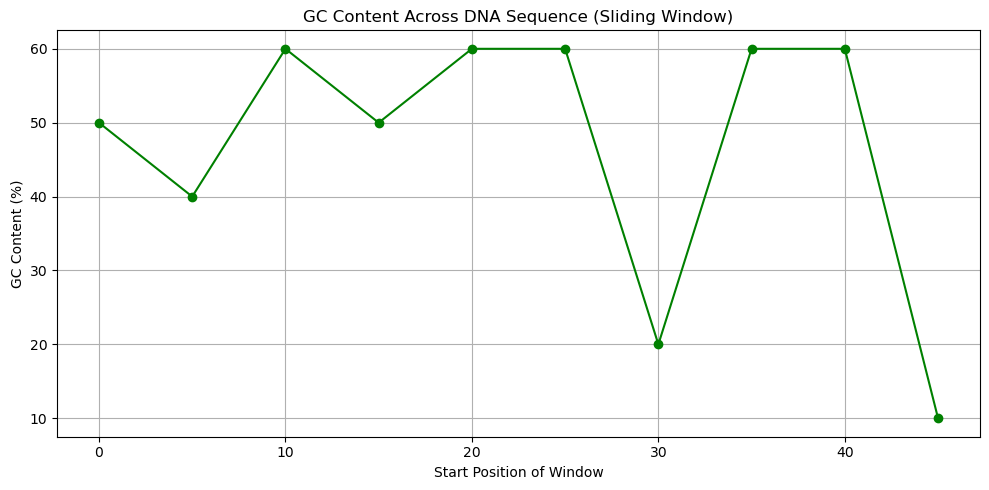

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
 
# 1. Clean the sequence
def clean(seq):
 
    cleaned_sequence= "".join([base for base in seq if base in 'ATGC'])
    return cleaned_sequence
  
# 2. Calculate GC percentage of a sequence
def gc_calculate(seq):

    cleaned= clean(seq)
    gc =0
    for base in cleaned:
        if base in 'GC':
            gc += 1

    gc_percent= round(gc/len(cleaned) * 100, 2) if len(cleaned) > 0 else 0
    return gc_percent

# 3. Calclate sliding GC content
def sliding_window(seq, window_size=10, step=5):
    
    cleaned= clean(seq)
    gc_results= []
    for i in range(0, len(cleaned) - window_size + 1, step):
        window = cleaned[i:i+window_size]
        gc_percent = gc_calculate(window)
        gc_results.append({'Position': i, 'Window': window, 'GC%': gc_percent})
        
    return gc_results

# 4. Input sequence
seq= input("Enter a sequence:").upper()

# 5. print whole sequence GC content
print(f"\nGC content of full sequence: {gc_calculate(seq)}%")

# 6. Get sliding GC content data
results= sliding_window(seq, window_size= 10, step= 5)

# 7. Convert to pandas DataFrame
gc_df= pd.DataFrame(results)
print("\nSliding GC Table:")
print(gc_df)

# 8. Plot GC% across positions
plt.figure(figsize= (10, 5))
plt.plot(gc_df["Position"], gc_df["GC%"], marker= 'o', linestyle='-', color='green')
plt.title("GC Content Across DNA Sequence (Sliding Window)")
plt.xlabel("Start Position of Window")
plt.ylabel("GC Content (%)")
plt.grid(True)
plt.tight_layout()
plt.show()
